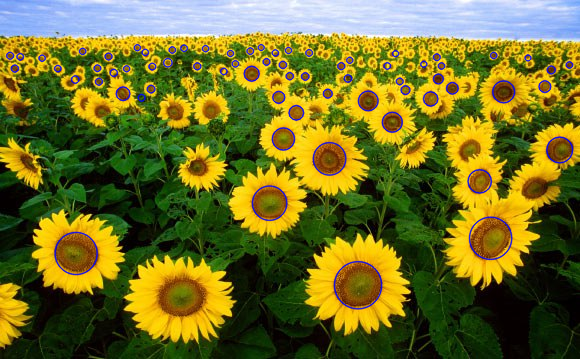

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("Sunflowers.jpg")

# Set up detector with default parameters.
detector = cv2.SimpleBlobDetector_create()

# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
cv2_imshow(blobs)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Treshholding nedir?

## Makale
  # https://learnopencv.com/blob-detection-using-opencv-python-c/


The function **cv2.drawKeypoints** takes the following arguments:

cv2.drawKeypoints(input image, keypoints, blank_output_array, color, flags)


#### Blob Detection Example 2

- https://stackoverflow.com/questions/58125495/how-to-count-how-many-white-balls-there-are-in-an-image-with-opencv-python

199


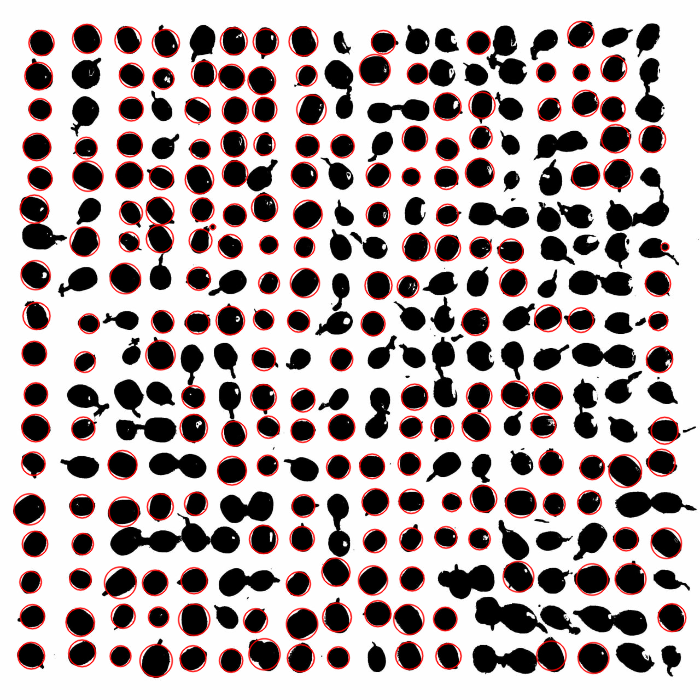

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('balls.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(700,700))
img = cv2.subtract(255, img)

detector = cv2.SimpleBlobDetector_create()

# Detect the blobs in the image
keypoints = detector.detect(img)
print(len(keypoints))


imgKeyPoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255),
cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(imgKeyPoints)
cv2.waitKey(0)

cv2.destroyAllWindows()

##### After Feature Engineering

blobs: 325


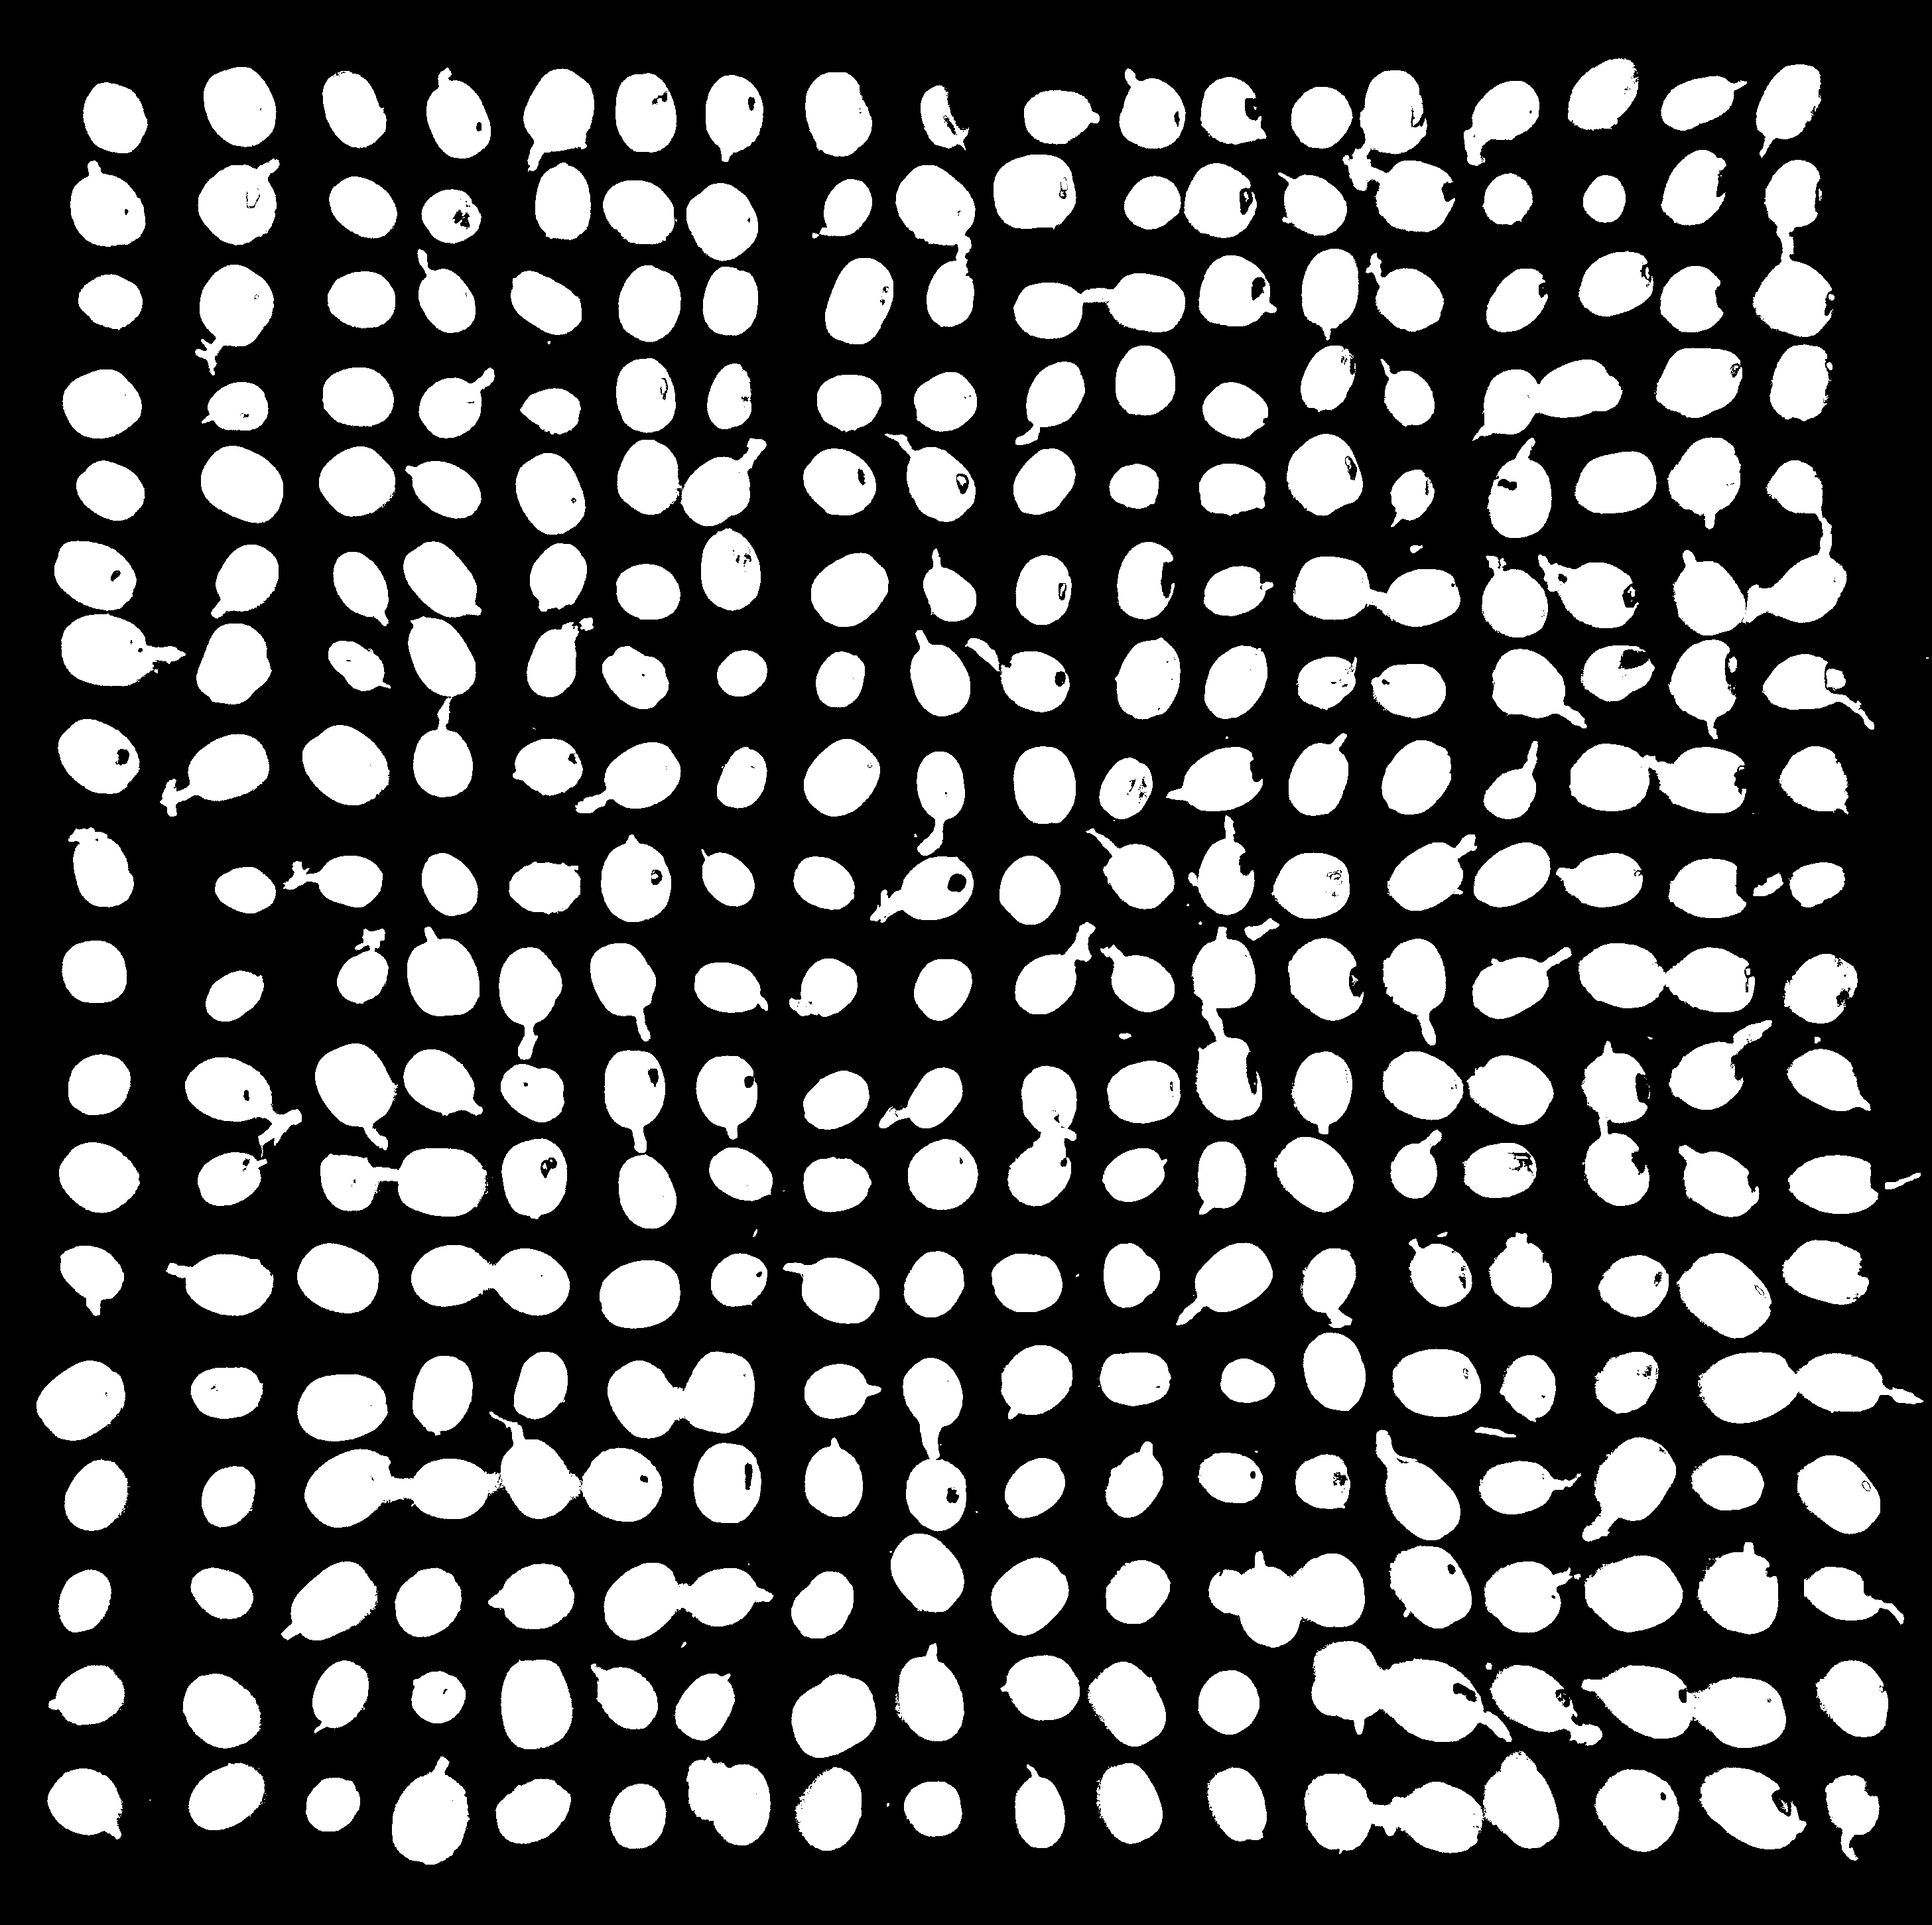

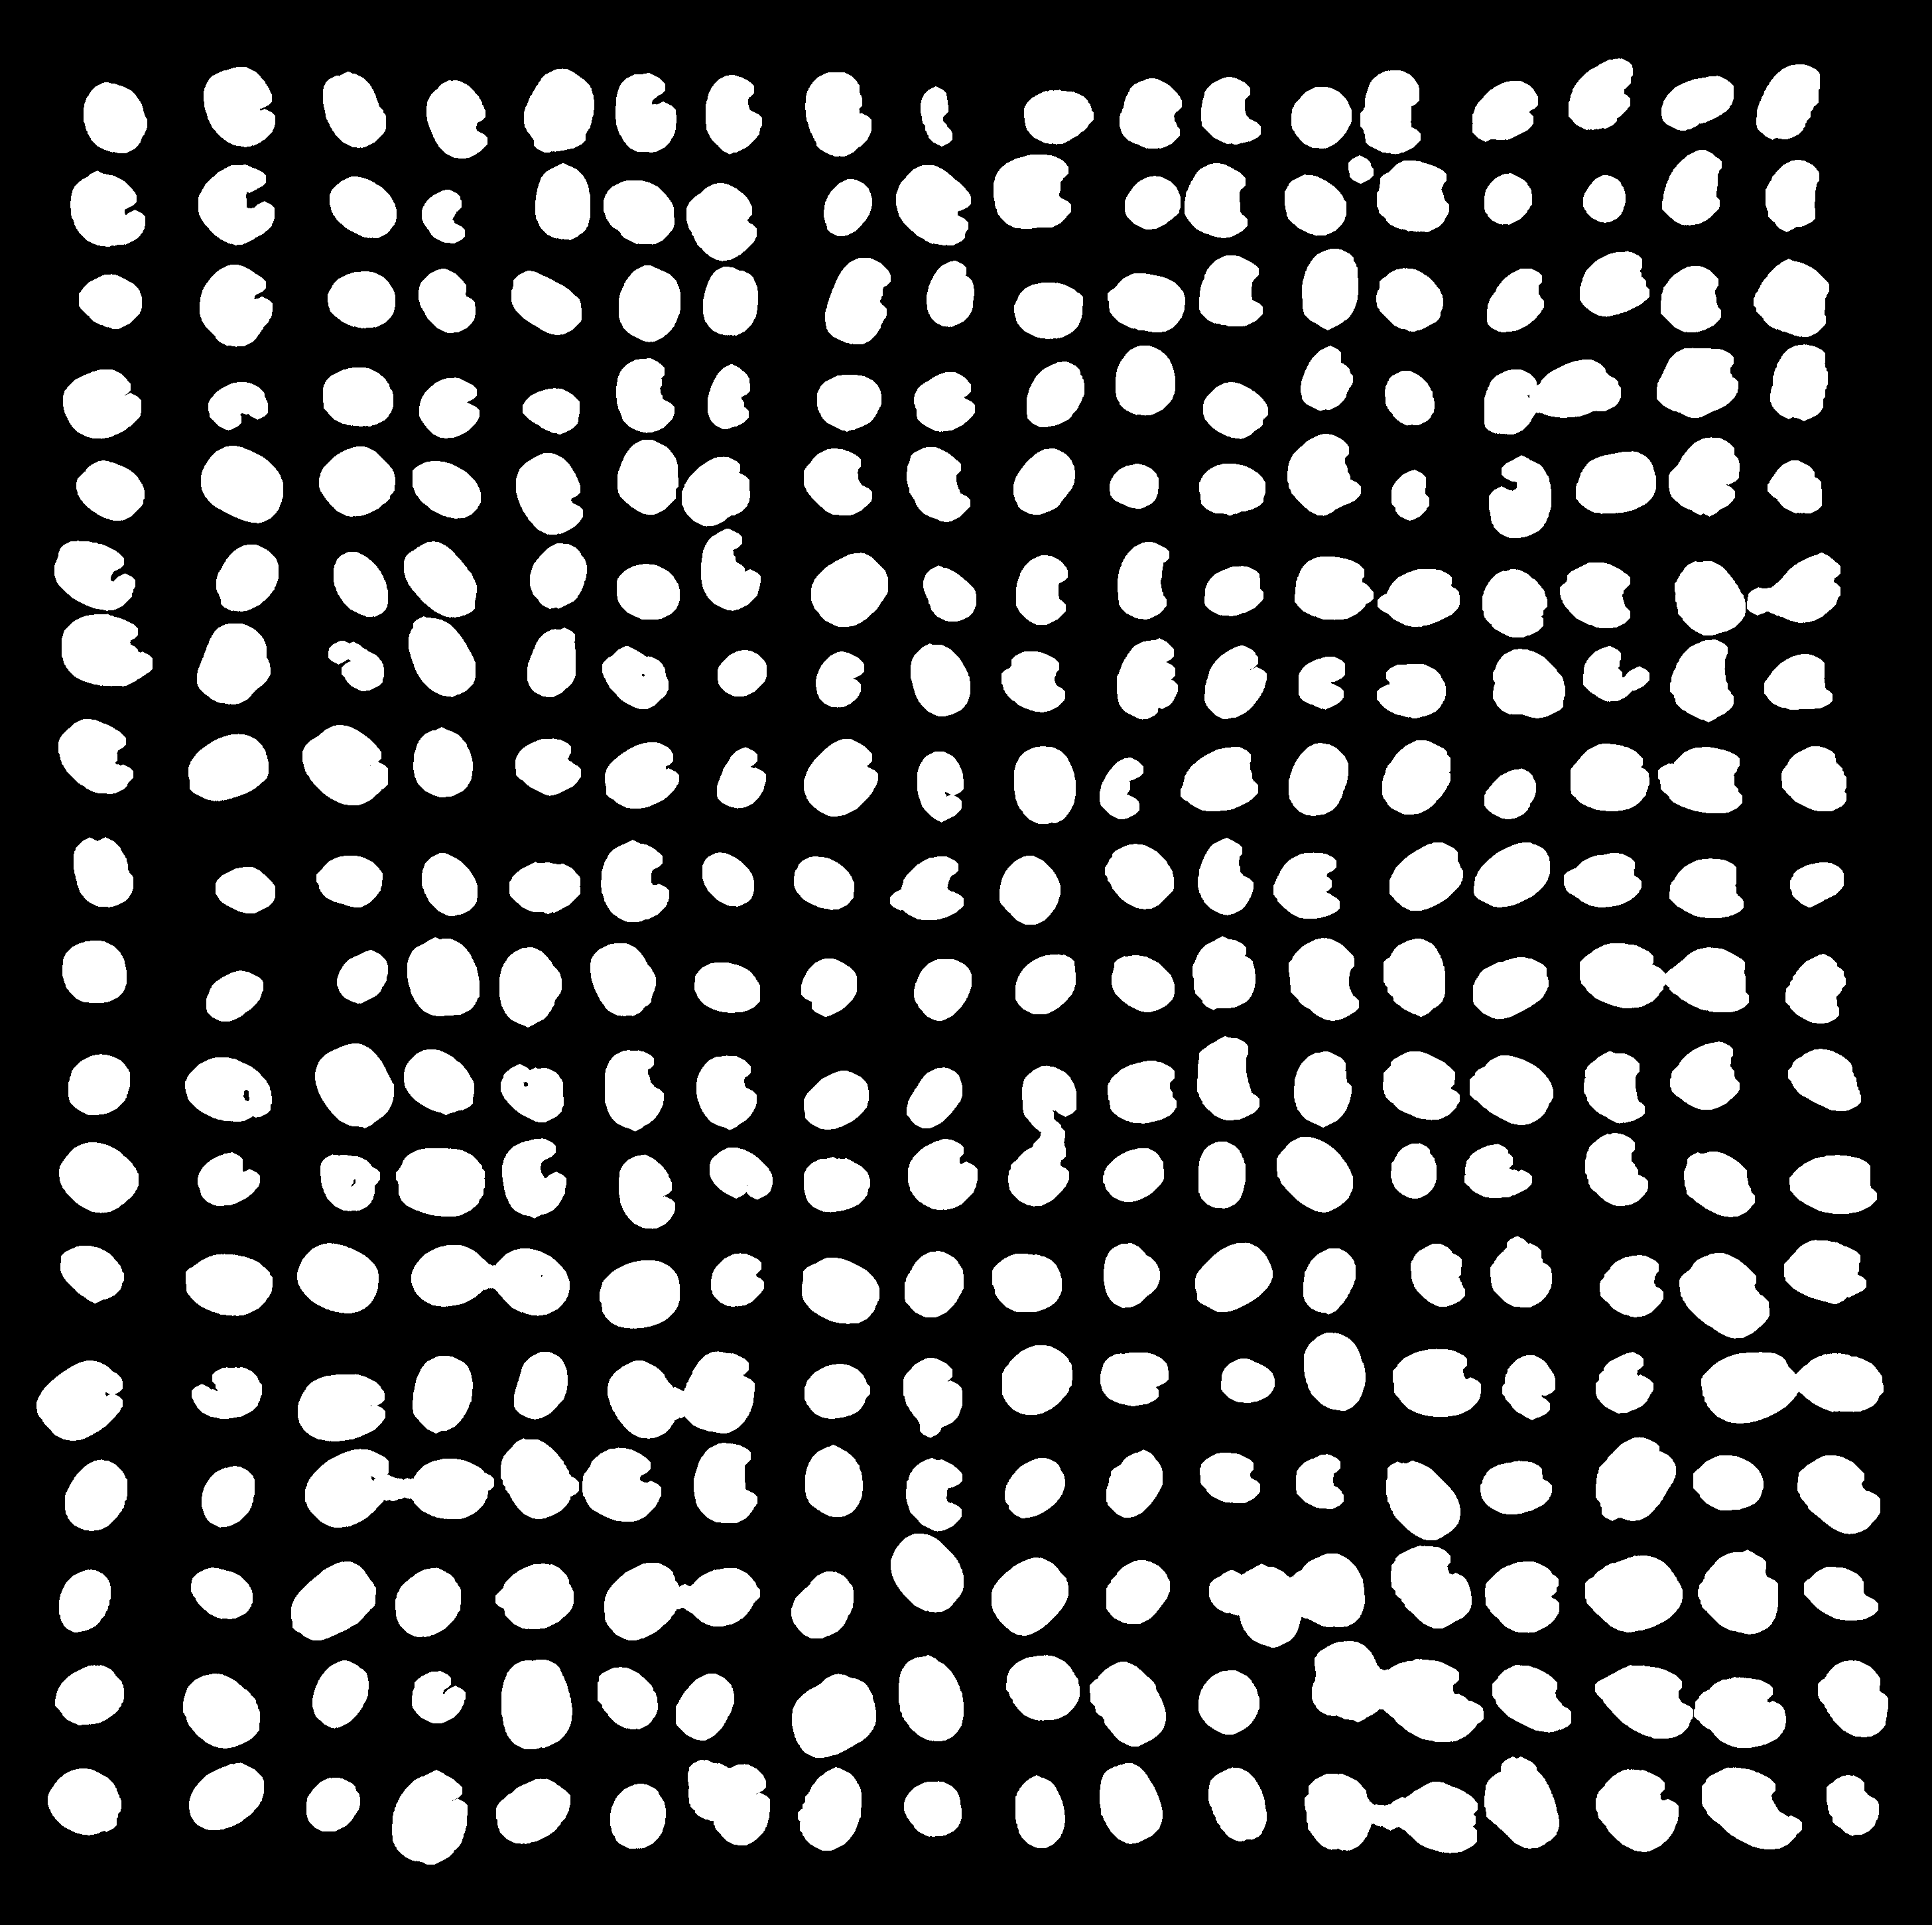

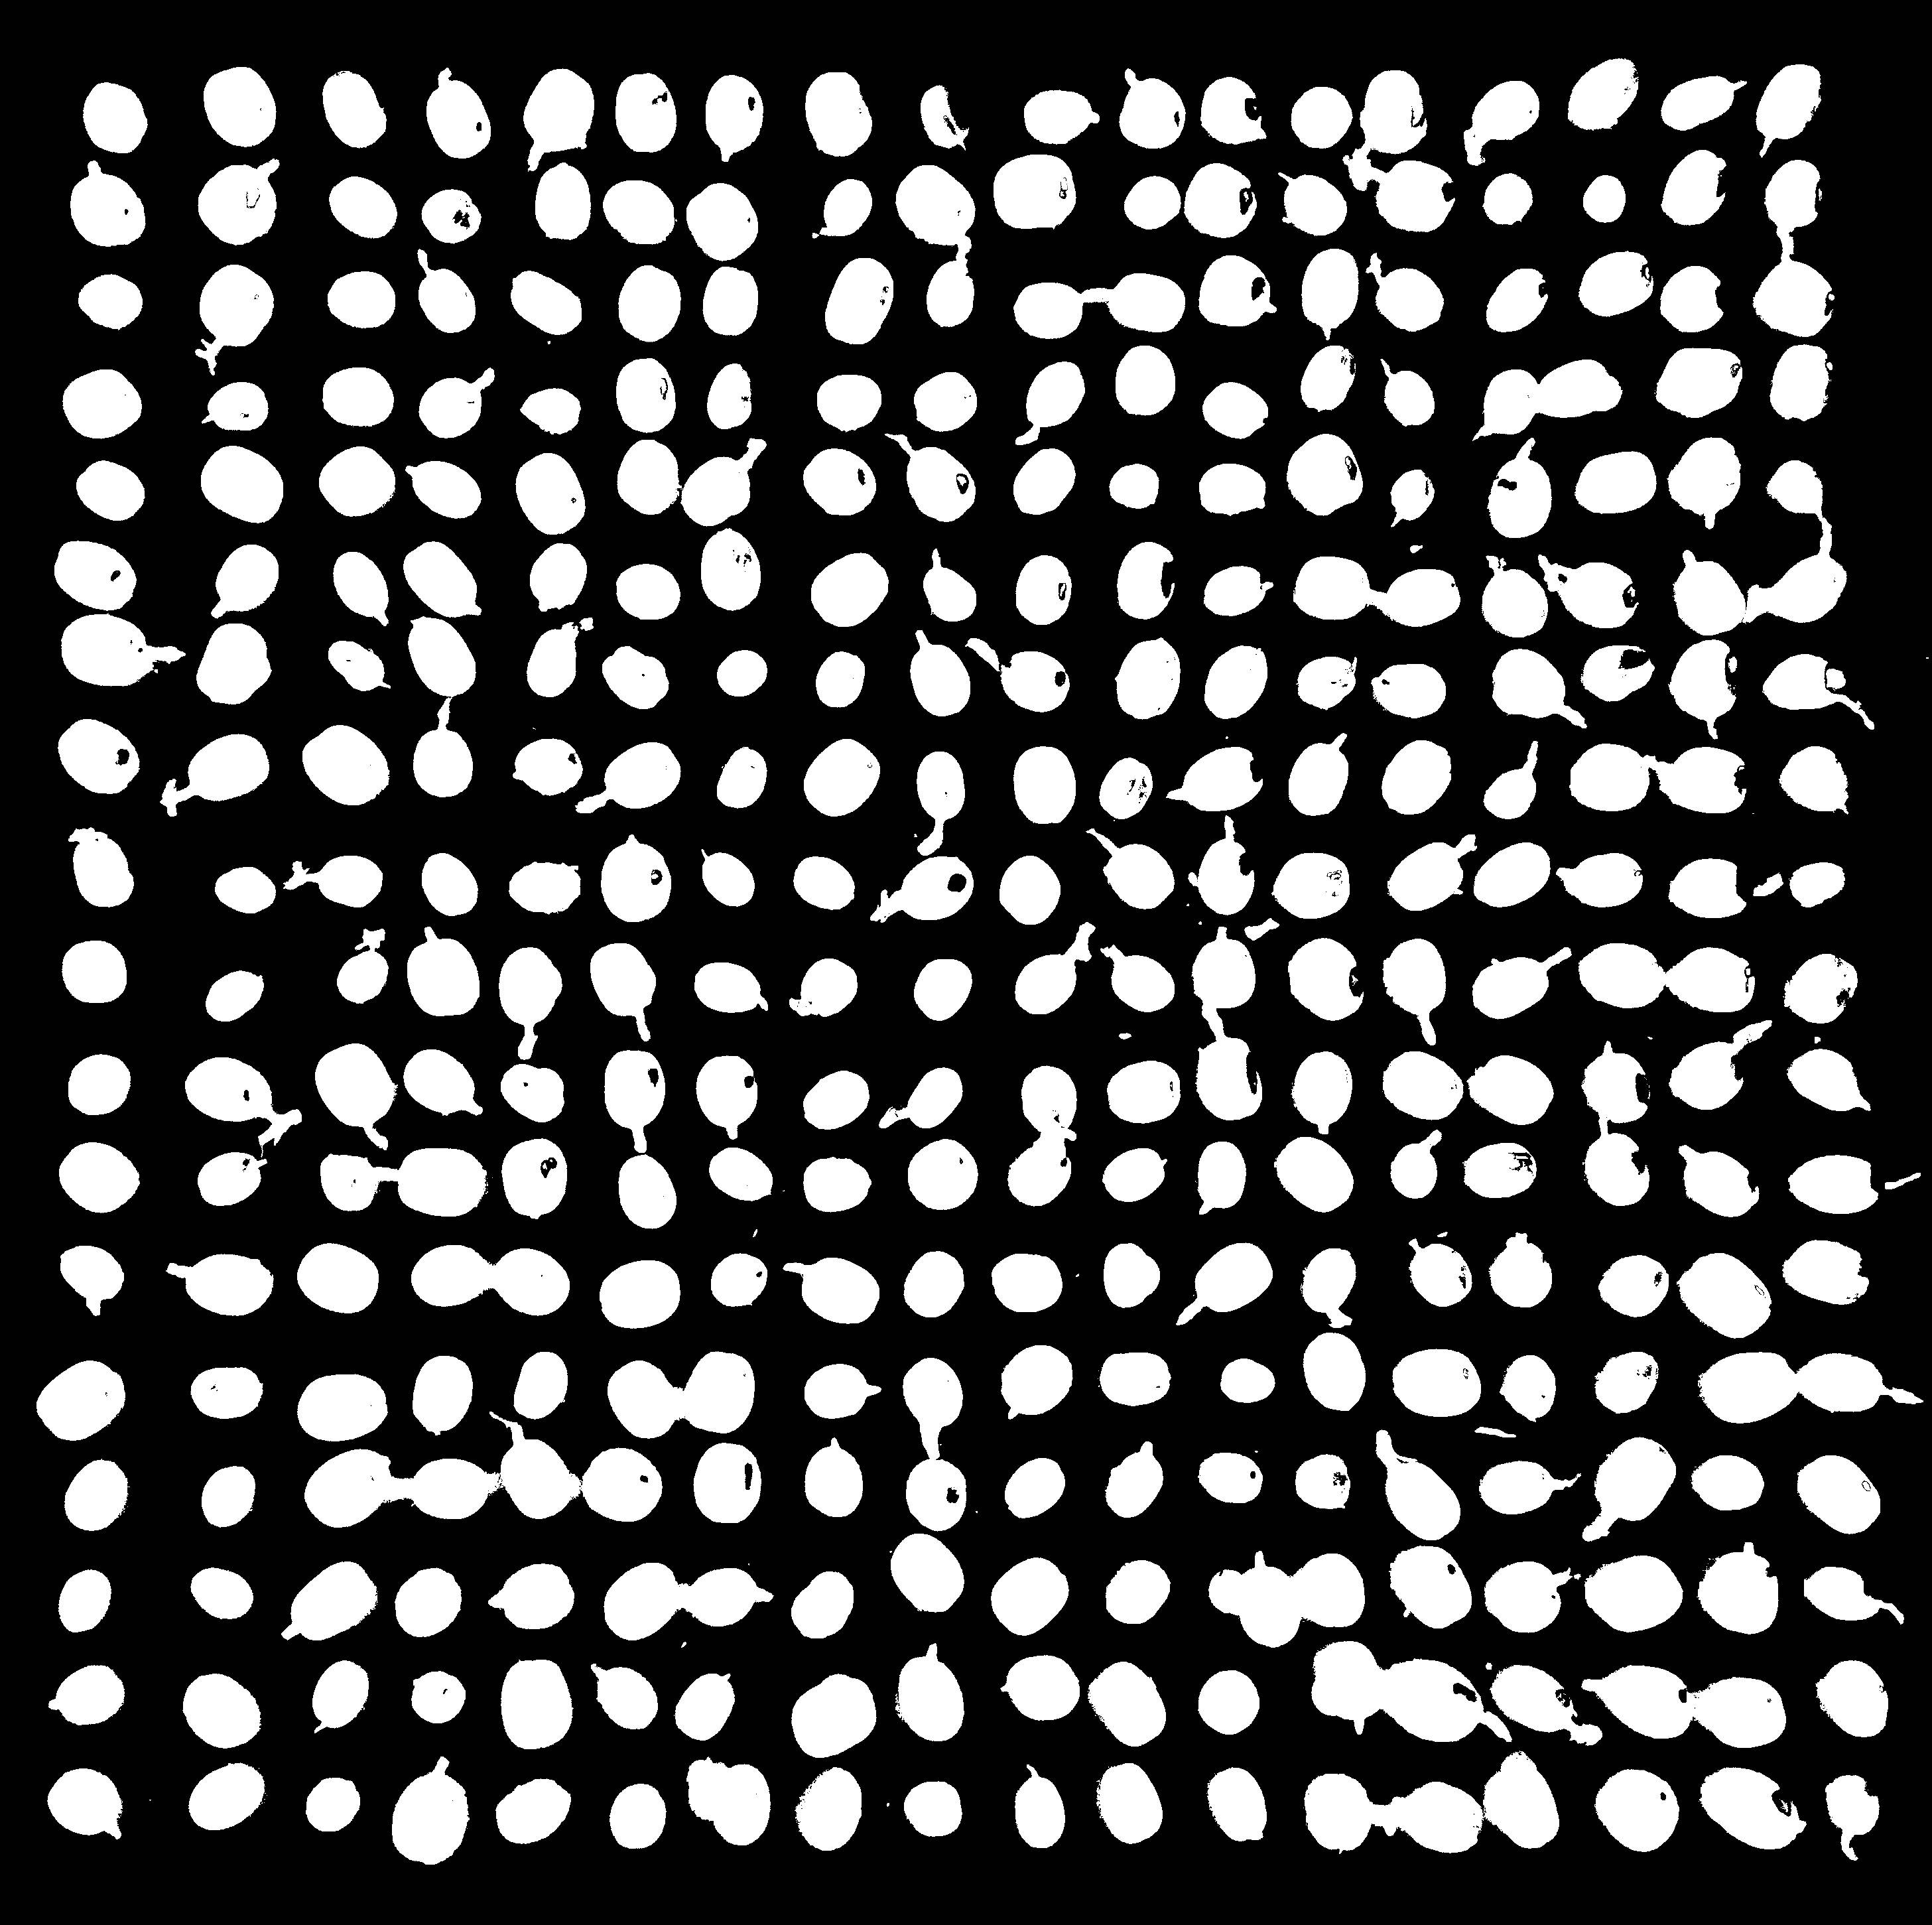

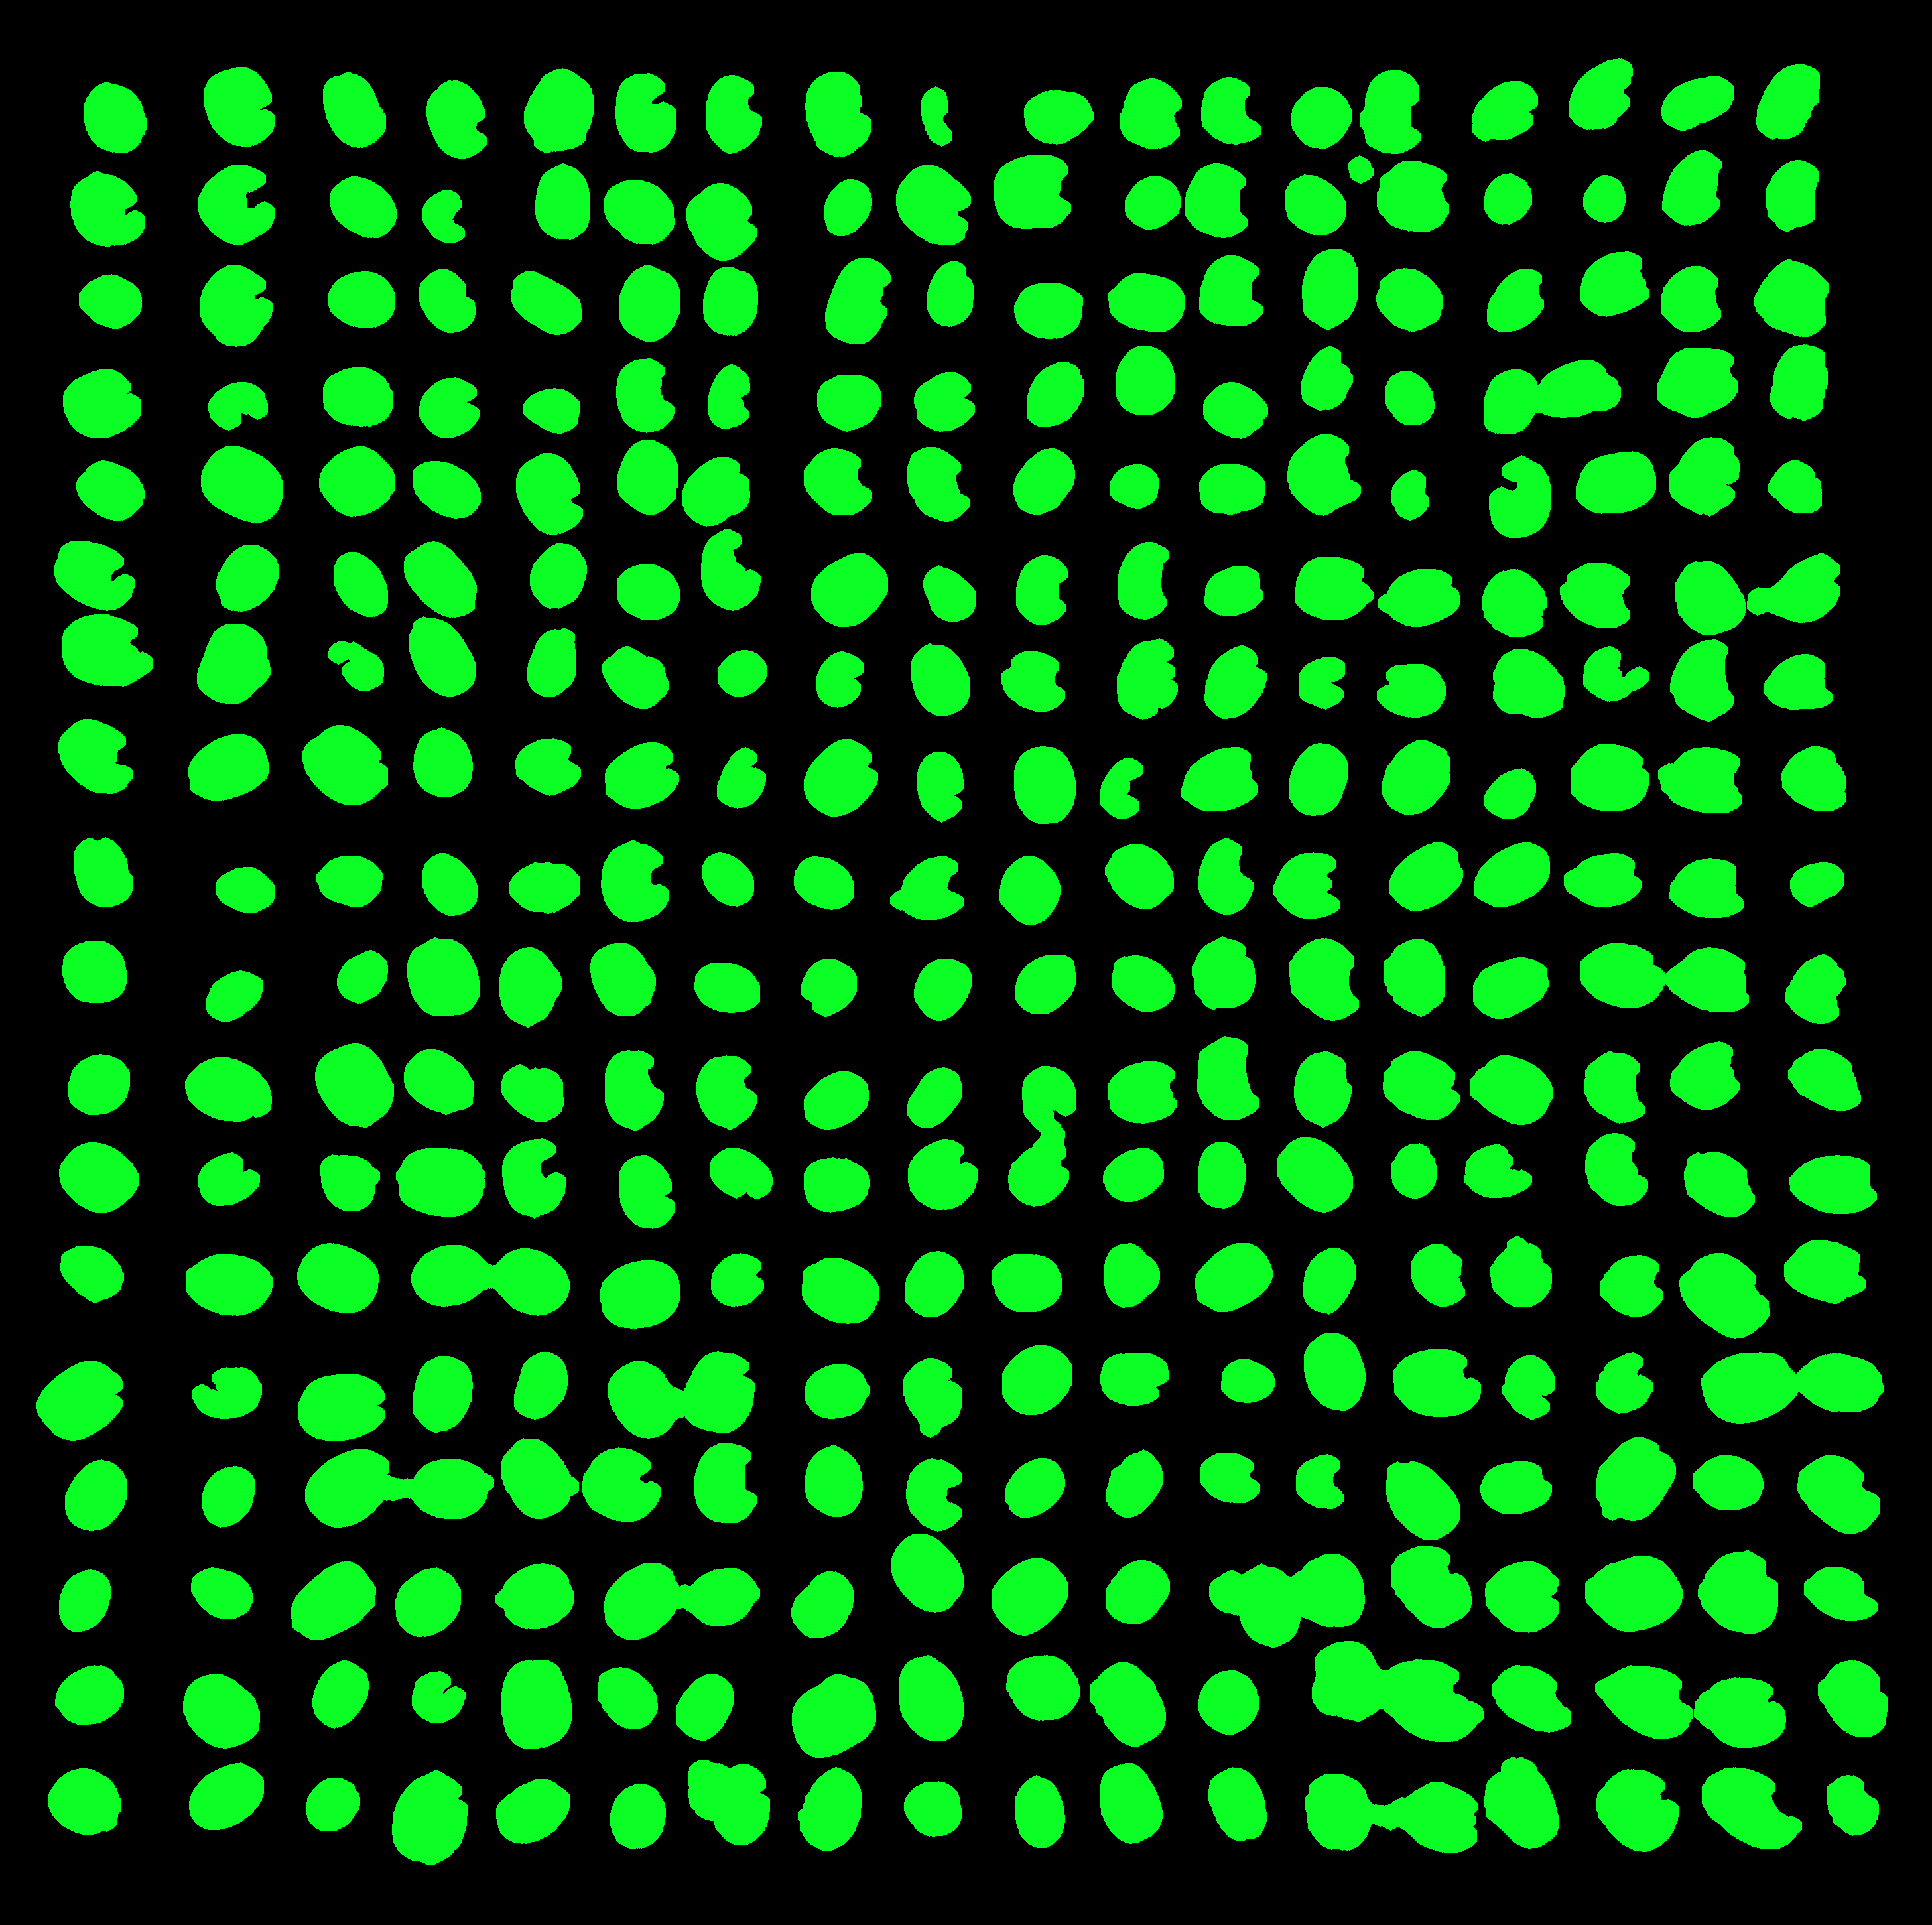

-1

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('balls.jpg')
mask = np.zeros(image.shape, dtype=np.uint8)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)

cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

blobs = 0
for c in cnts:
    area = cv2.contourArea(c)
    cv2.drawContours(mask, [c], -1, (36,255,12), -1)
    if area > 13000:
        blobs += 2
    else:
        blobs += 1

print('blobs:', blobs)

cv2_imshow(thresh)
cv2_imshow(opening)
cv2_imshow(image)
cv2_imshow(mask)
cv2.waitKey()